In [1]:
from iminuit import Minuit
import numpy as np

In [2]:
%run ./interpfunctions.ipynb

In [3]:
def data(name):
    #name = "SN2004eo.txt"

    x_dat = []
    z_dat = []
    z_dat_error = []
    bands = []

    file = open(name)
    lines = file.readlines()
    file.close()

    for line in lines:
        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        x_dat.append(co[0])
        z_dat.append(co[2])
        z_dat_error.append(co[3])
        bands.append(co[1])

    x_dat = np.array(x_dat, dtype=float)
    z_dat = np.array(z_dat, dtype=float)
    z_dat_error = np.array(z_dat_error, dtype=float)

    redshift = float(co[6])

    nonrepeatedbands = list(set(bands))
    print(nonrepeatedbands)


    interpfunc = []
    for i in range(0,len(nonrepeatedbands)):
        #print(i)
        interpfunc.append(einterpfun(nonrepeatedbands[i]))

    #print("ok")

    '''
    for i in range(0,len(x_dat)):

        z_dat_error[i] = 2*np.log(10)*(10**((zp - z_dat[i])/2.5))*z_dat_error[i]/2.5
        z_dat[i] = csp.band_mag_to_flux(z_dat[i], filter_name)

    '''
    for i in range(0,len(x_dat)):

        x_dat[i] = x_dat[i]*(1+redshift)
        z_dat[i] = z_dat[i]*(1+redshift)**3
        z_dat_error[i] = z_dat_error[i]*(1+redshift)**3



    def chiquadvalue(t0, x0, x1, x2):
        '''
        if len(nonrepeatedbands) == 1:

            par = {"t0_1":X[0], "x0_1":X[1], "x1_1":X[2], "x2_1":X[3]}

        if len(nonrepeatedbands) == 2:

            par = {"t0_1":X[0], "x0_1":X[1], "x1_1":X[2], "x2_1":X[3], "t0_2":X[4], "x0_2":X[5], "x1_2":X[6], "x2_2":X[7]}

        if len(nonrepeatedbands) == 3:

            par = {"t0_1":X[0], "x0_1":X[1], "x1_1":X[2], "x2_1":X[3], "t0_2":X[4], "x0_2":X[5], "x1_2":X[6], "x2_2":X[7], "t0_3":X[8], "x0_3":X[9], "x1_3":X[10], "x2_3":X[11]}


        if len(nonrepeatedbands) == 4:

            par = {"t0_1":X[0], "x0_1":X[1], "x1_1":X[2], "x2_1":X[3], "t0_2":X[4], "x0_2":X[5], "x1_2":X[6], "x2_2":X[7], "t0_3":X[8], "x0_3":X[9], "x1_3":X[10], "x2_3":X[11], "t0_4":X[12], "x0_4":X[13], "x1_4":X[14], "x2_4":X[15]}    

        '''
        chiquad = 0

        for i in range(0,len(nonrepeatedbands)):
            #print(i)
            x_dat_temp = []
            z_dat_temp = []
            z_dat_error_temp = []

            for j in range(0,len(bands)):

                if bands[j] == nonrepeatedbands[i]:

                    x_dat_temp.append(x_dat[j])
                    z_dat_temp.append(z_dat[j])
                    z_dat_error_temp.append(z_dat_error[j])

            #print(len(x_dat_temp))
            #print(z_dat_temp)

            for k in range(0,len(x_dat_temp)):

                if -10 < x_dat_temp[k] - t0 < 50:
                    #print("!")
                    #print(x_dat[i] - par[0])
                    #chiquad += ((x0*(f_m0(x_dat[i] - t0) + x1*f_m1(x_dat[i] - t0) + x2*f_m2(x_dat[i] -t0)) - z_dat[i])/z_dat_error[i])**2
                    chiquad += ((x0*(interpfunc[i][0](x_dat_temp[k] - t0) + x1*interpfunc[i][1](x_dat_temp[k] -  t0) + x2*interpfunc[i][2](x_dat_temp[k] -t0)) - z_dat_temp[k])/z_dat_error_temp[k])**2

        #print(chiquad)

        if chiquad > 0:

            return chiquad

        else:

            return 10**200


    max_index = list(z_dat).index(max(z_dat))    
    '''
    if len(nonrepeatedbands) == 1:

        m = Minuit(chiquadvalue,use_array_call=True, forced_parameters=["t0_1","x0_1","x1_1", "x2_1"], t0_1 = x_dat[max_index], x0_1 = 0.1, x1_1 = 0.1, x2_1 = 0.01) 

    if len(nonrepeatedbands) == 2:

        m = Minuit(chiquadvalue,use_array_call=True, forced_parameters=["t0_1","x0_1","x1_1", "x2_1", "t0_2","x0_2","x1_2", "x2_2"], t0_1 = x_dat[max_index], x0_1 = 0.1, x1_1 = 0.1, x2_1 = 0.01,  t0_2 = x_dat[max_index], x0_2 = 0.1, x1_2 = 0.1, x2_2 = 0.01) 

    if len(nonrepeatedbands) == 3:

        m = Minuit(chiquadvalue,use_array_call=True, forced_parameters=["t0_1","x0_1","x1_1", "x2_1", "t0_2","x0_2","x1_2", "x2_2", "t0_3","x0_3","x1_3", "x2_3"], t0_1 = x_dat[max_index], x0_1 = 0.1, x1_1 = 0.1, x2_1 = 0.01, t0_2 = x_dat[max_index], x0_2 = 0.1, x1_2 = 0.1, x2_2 = 0.01, t0_3 = x_dat[max_index], x0_3 = 0.1, x1_3 = 0.1, x2_3 = 0.01) 

    if len(nonrepeatedbands) == 4:

        m = Minuit(chiquadvalue,use_array_call=True, forced_parameters=["t0_1","x0_1","x1_1", "x2_1", "t0_2","x0_2","x1_2", "x2_2", "t0_3","x0_3","x1_3", "x2_3","t0_4","x0_4","x1_4", "x2_4"], t0_1 = x_dat[max_index], x0_1 = 0.1, x1_1 = 0.1, x2_1 = 0.01, t0_2 = x_dat[max_index], x0_2 = 0.1, x1_2 = 0.1, x2_2 = 0.01, t0_3 = x_dat[max_index], x0_3 = 0.1, x1_3 = 0.1, x2_3 = 0.01, t0_4 = x_dat[max_index], x0_4 = 0.1, x1_4 = 0.1, x2_4 = 0.01) 
    '''
    #print(max_index)
    m = Minuit(chiquadvalue, t0 = x_dat[max_index], x0 = 0.2/7, x1 = 0.001, x2 = 0.0001)

    m.migrad()

    print(m.values) 

    return m.fval / (len(x_dat) - len(m.values))

In [4]:
functions = data("SN2004eo.txt")

['cspb', 'cspg', 'cspi', 'cspr']


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:63: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:82: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subrang

<ValueView of Minuit at 36edb68>
  t0: 282.7363519055493
  x0: 0.04295793379049552
  x1: -0.1255401825781061
  x2: -0.04597525356244223


In [5]:
x_dat = []
z_dat = []
z_dat_error = []
bands = []

file = open("SN2004eo.txt")
lines = file.readlines()
file.close()

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    x_dat.append(co[0])
    z_dat.append(co[2])
    z_dat_error.append(co[3])
    bands.append(co[1])

x_dat = np.array(x_dat, dtype=float)
z_dat = np.array(z_dat, dtype=float)
z_dat_error = np.array(z_dat_error, dtype=float)

redshift = float(co[6])

for i in range(0,len(x_dat)):

    x_dat[i] = x_dat[i]*(1+redshift)
    z_dat[i] = z_dat[i]*(1+redshift)**3
    z_dat_error[i] = z_dat_error[i]*(1+redshift)**3

nonrepeatedbands = list(set(bands))
print(nonrepeatedbands)


interpfunc = []
for i in range(0,len(nonrepeatedbands)):
    #print(i)
    interpfunc.append(einterpfun(nonrepeatedbands[i]))


['cspb', 'cspg', 'cspi', 'cspr']


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:63: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:82: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subrang

In [14]:
nonrepeatedbands

['cspb', 'cspg', 'cspi', 'cspr']

In [29]:
x_plot = []
z_plot = []

def theory(tv, x0, x1, x2):
    #print(tv, x0, x1, x2)

    return x0*(interpfunc[2][0](tv) + x1*interpfunc[2][1](tv) + x2*interpfunc[2][2](tv))

for i in range(0,len(x_gr)):

    x_plot.append(x_gr[i])
    z_plot.append(theory(x_gr[i], 0.04295793378947724, -0.1255401824922351, -0.04597525346018403))

x_plot_dat = []
z_plot_dat = []
z_error_plot_dat = []

for i in range(0,len(x_dat)):
    
    if bands[i] == "cspi":
        
        x_plot_dat.append(x_dat[i]-282.7363519028861)
        z_plot_dat.append(z_dat[i])
        z_error_plot_dat.append(z_dat_error[i])

<IPython.core.display.Javascript object>


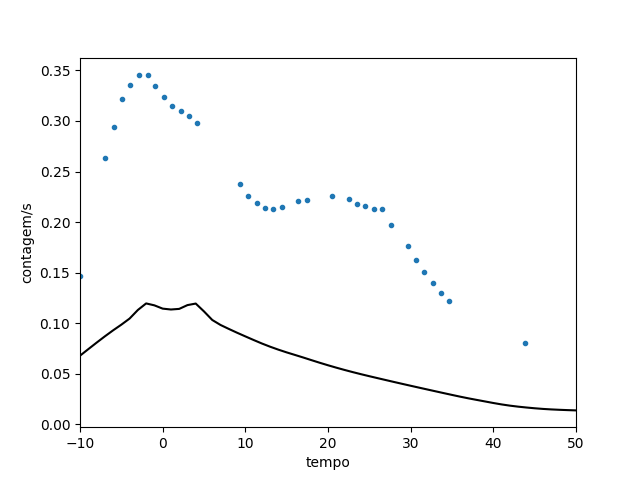

In [30]:
%matplotlib notebook
plt.plot(x_plot, z_plot, 'k')
plt.errorbar(x_plot_dat, z_plot_dat, yerr=z_error_plot_dat, fmt='.')
plt.xlim(-10,50)
plt.xlabel("tempo")
plt.ylabel("contagem/s")
plt.show()

In [19]:
import glob

In [20]:
def chiquaddof(name):

    x_dat = []
    z_dat = []
    z_dat_error = []

    file = open(name)
    lines = file.readlines()
    file.close()

    for line in lines:
        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        x_dat.append(co[0])
        z_dat.append(co[1])
        z_dat_error.append(co[2])

    x_dat = np.array(x_dat, dtype=float)
    z_dat = np.array(z_dat, dtype=float)
    z_dat_error = np.array(z_dat_error, dtype=float)

    filter_name = lines[0][1:-1]
    
    redshift = float(lines[1][1:])
    #redshift = 0.012526589416171241
    
    #print(filter_name)
    #print(redshift)

    for i in range(0,len(x_dat)):

        z_dat_error[i] = 2*np.log(10)*(10**((zp - z_dat[i])/2.5))*z_dat_error[i]/2.5
        z_dat[i] = csp.band_mag_to_flux(z_dat[i], filter_name)


    for i in range(0,len(x_dat)):

        x_dat[i] = x_dat[i]*(1+redshift)
        z_dat[i] = z_dat[i]*(1+redshift)**3
        z_dat_error[i] = z_dat_error[i]*(1+redshift)**3

    from iminuit import Minuit

    def chi_quad(t0, x0, x1, x2):

        chiquad = 0    

        for i in range(0,len(x_dat)):

            if -10 < x_dat[i] - t0 < 50:

                #print(x_dat[i] - par[0])

                chiquad += ((x0*(f_m0(x_dat[i] - t0) + x1*f_m1(x_dat[i] - t0) + x2*f_m2(x_dat[i] -t0)) - z_dat[i])/z_dat_error[i])**2
        if chiquad > 0:

            return chiquad

        else:

            return 10**200

    max_index = list(z_dat).index(max(z_dat))

    #x_dat[max_index]

    m = Minuit(chi_quad, t0 = x_dat[max_index], x0 = 0.1, x1 = 0.1, x2 = 0.01)
    
    
    m.migrad()
    
    print(m.values) 

    x_plot = []
    z_plot = []
    
    def theory(tv, x0, x1, x2):
        #print(tv, x0, x1, x2)

        return x0*(f_m0(tv) + x1*f_m1(tv) + x2*f_m2(tv))

    for i in range(0,len(x_gr)):

        x_plot.append(x_gr[i])
        z_plot.append(theory(x_gr[i], m.values[1], m.values[2], m.values[3]))

    x_plot_dat = []
    z_plot_dat = []

    for i in range(0,len(x_dat)):

        x_plot_dat.append(x_dat[i]-m.values[0])
        z_plot_dat.append(z_dat[i])

    '''
    matplotlib notebook
    plt.plot(x_plot, z_plot, 'k')
    plt.errorbar(x_plot_dat, z_plot_dat, yerr=z_dat_error, fmt='.')
    plt.xlim(-10,50)
    plt.xlabel("tempo")
    plt.ylabel("contagem/s")
    plt.show()
    '''
    return x_plot, z_plot, x_plot_dat, z_plot_dat, z_dat_error, m.fval / (len(z_plot_dat) - len(m.values))

In [21]:
sn_names = glob.glob("*.txt")

In [22]:
chiquaddof(sn_names[0])[-1]

/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 214b758>
  t0: 1056.1171964930984
  x0: 0.045691885509779054
  x1: -0.29135916942353557
  x2: 0.12452573916260101


208.80454286361166

In [23]:
sn_names[1]

'SN2005M_g.txt'

In [24]:
chiquadvalues = []

In [25]:
for i in range(0,len(sn_names)):
    
    chiquadvalues.append(chiquaddof(sn_names[i])[-1])
    

/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 211f958>
  t0: 1056.1171964930984
  x0: 0.045691885509779054
  x1: -0.29135916942353557
  x2: 0.12452573916260101


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 211a028>
  t0: 412.5325470006873
  x0: 0.03293710647438199
  x1: -0.12559035764663878
  x2: 0.2533081649299411


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 21195e8>
  t0: 1243.6614882144388
  x0: 0.030491601871808525
  x1: -0.1117460792354954
  x2: 0.1906352116275015


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 20f2d88>
  t0: 704.0610456787823
  x0: 0.07844326190645055
  x1: -0.3920451736908906
  x2: 0.051211231345490334
<ValueView of Minuit at 2115828>
  t0: 839.8351636874932
  x0: 0.065459575016699
  x1: -0.08943253814294015
  x2: 0.09227095511912989

/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 205dc08>
  t0: 1571.5412727159471
  x0: 0.04610875808489991
  x1: -0.10190421233548214
  x2: 0.19156703268484365
<ValueView of Minuit at 1100a88>
  t0: 1429.6803757839134
  x0: 0.38387880299466237
  x1: -0.29104701258935234
  x2: -0.10932440185220811

/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 1101588>
  t0: 282.73584299519774
  x0: 0.04930068528014307
  x1: -0.14955212970303705
  x2: -0.0546535309986862


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 1101e48>
  t0: 1062.7452125897917
  x0: 0.014693101210173004
  x1: -0.11614163316958051
  x2: -0.116059275622426


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 1102c58>
  t0: 1590.1857407032708
  x0: 0.03918309826391234
  x1: -0.10137809026941555
  x2: 0.11212254440618528


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 1103a38>
  t0: 1739.087265320925
  x0: 0.1394321447864002
  x1: -0.0928457965699077
  x2: 0.18001585653472799


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 22ff448>
  t0: 710.0883981114196
  x0: 0.014874019619736958
  x1: -0.09695499400703347
  x2: -0.028805192635120627


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages

<ValueView of Minuit at 2301128>
  t0: 272.15533844496224
  x0: 0.012003618501187105
  x1: -0.1284358218102286
  x2: -0.07632278295093502
<ValueView of Minuit at 2305308>
  t0: 1854.0792480066932
  x0: 1.7126509915747452e-05
  x1: 55.71485235918897
  x2: 1624.577522179558


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 233c9c8>
  t0: 1840.156695025944
  x0: 0.08455649530125005
  x1: -0.11581492493884642
  x2: -0.06419851355026748


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages

<ValueView of Minuit at 2340f48>
  t0: 1158.8051918237275
  x0: 0.04075205816789994
  x1: -0.1285859801832085
  x2: 0.2478675024224341
<ValueView of Minuit at 2344ef8>
  t0: 1180.2337319838184
  x0: 0.36328443166555496
  x1: -0.11493369174402746
  x2: 0.0407538617401191

/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.



<ValueView of Minuit at 2347cb8>
  t0: 707.9018563963613
  x0: 0.03151719830405961
  x1: -0.12436734537752589
  x2: 0.007366304917217074


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 21c6558>
  t0: 1243.7788087980946
  x0: 0.016930223437251212
  x1: -0.08206785161250607
  x2: -0.02534802711920646


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 21ce678>
  t0: 308.1200062713969
  x0: 0.06258731144449599
  x1: -0.12165672402418837
  x2: 0.10633326187071289


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 21d6518>
  t0: 719.2206572181691
  x0: 0.03949976850147151
  x1: -0.13652246369886487
  x2: -0.08915668215865062


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 21da1f8>
  t0: 684.682557955376
  x0: 0.027990871792383163
  x1: 0.3396265650244335
  x2: 0.4686810433199108


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 21df7d8>
  t0: 1014.8378650893314
  x0: 0.032933373039279915
  x1: -0.10654742747505634
  x2: 0.17098865660433057


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 21e4788>
  t0: 1836.689988001927
  x0: 0.015846518609367706
  x1: -0.06674275280234576
  x2: 0.08821514846783507


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 21e8cd8>
  t0: 695.7624219413492
  x0: 0.009863516004568008
  x1: -0.11864835499651862
  x2: 0.15922132988849702


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 21ed858>
  t0: 1415.7293628557936
  x0: 0.007651597243214114
  x1: -0.09254700743764915
  x2: 0.038112598863971184
<ValueView of Minuit at 21f2a68>
  t0: 1406.639834645843
  x0: 0.20848882249683895
  x1: -0.08341065885077674
  x2: 0.1715185747666772

/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages


<ValueView of Minuit at 21f53c8>
  t0: 789.7139283502667
  x0: 0.08679425042356627
  x1: -0.0787142942783911
  x2: 0.11633411185696597


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages

<ValueView of Minuit at 21fa798>
  t0: 1885.2875295860456
  x0: 0.037155903946975884
  x1: -0.1101408831644979
  x2: 0.17113397243417902
<ValueView of Minuit at 21fe388>
  t0: 1867.9869632483105
  x0: 0.008908392996275868
  x1: -0.5383408177459358
  x2: 0.0977504765203223


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 2205f88>
  t0: 841.6778028451281
  x0: 0.1198911644823604
  x1: -0.10709168945035903
  x2: -0.06777317926645147
<ValueView of Minuit at 220a178>
  t0: 1929.0130533124934
  x0: 0.021686594358807546
  x1: -0.12208822089784964
  x2: -0.006519089755499706


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


In [26]:
name = sn_names[1]

/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages

<ValueView of Minuit at 205dc08>
  t0: 412.5325470006873
  x0: 0.03293710647438199
  x1: -0.12559035764663878
  x2: 0.2533081649299411
<ValueView of Minuit at 2115828>
  t0: 412.5325470006873
  x0: 0.03293710647438199
  x1: -0.12559035764663878
  x2: 0.2533081649299411


<IPython.core.display.Javascript object>


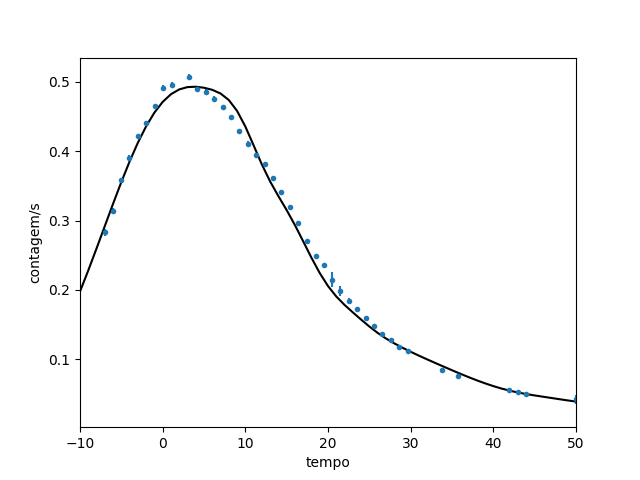

/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 2115828>
  t0: 412.5325470006873
  x0: 0.03293710647438199
  x1: -0.12559035764663878
  x2: 0.2533081649299411


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 205dc08>
  t0: 412.5325470006873
  x0: 0.03293710647438199
  x1: -0.12559035764663878
  x2: 0.2533081649299411


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: InitialParamWarning: errordef is not given. Default to 1.


<ValueView of Minuit at 20f2d88>
  t0: 412.5325470006873
  x0: 0.03293710647438199
  x1: -0.12559035764663878
  x2: 0.2533081649299411


In [27]:
%matplotlib notebook

plt.plot(chiquaddof(name)[0], chiquaddof(name)[1], 'k')
plt.errorbar(chiquaddof(name)[2], chiquaddof(name)[3], yerr=chiquaddof(name)[4], fmt='.')
plt.xlim(-10,50)
plt.xlabel("tempo")
plt.ylabel("contagem/s")
plt.show()

In [28]:
chiquadvalues

[208.80454286361166,
 13.161317622934755,
 121.5062502150909,
 604.1359665004854,
 40.268467356867525,
 65.06522317136009,
 89.99474014866882,
 22.327413907728804,
 10.024202962199647,
 46.33304003503876,
 75.90847279720963,
 7.6472201335405705,
 31.589020483002223,
 150.723601891772,
 37.98912165017431,
 34.231911526249895,
 23.996675364486787,
 15.897839217887416,
 55.057279530558155,
 60.589144762775454,
 10.988080610340896,
 27.77149658060763,
 39.3910025159585,
 22.141120406947778,
 17.125625085951363,
 1.7595069308151425,
 38.063873007728354,
 64.42762198899138,
 53.824014277248054,
 212.6284770309377,
 6.201934832319735,
 18.899290771053906]

In [29]:
import os.path

In [30]:
'''
name_of_file = "nonamebband"

completeName = os.path.join("/home/joao/Documentos/comparacao", name_of_file+".dat")      

f = open(completeName, 'w')
for i in range(0,len(chiquadvalues)):
    
    f.write(str(chiquadvalues[i])+"\n")
    
f.close()
'''

'\nname_of_file = "nonamebband"\n\ncompleteName = os.path.join("/home/joao/Documentos/comparacao", name_of_file+".dat")      \n\nf = open(completeName, \'w\')\nfor i in range(0,len(chiquadvalues)):\n    \n    f.write(str(chiquadvalues[i])+"\n")\n    \nf.close()\n'